# ベイズ推論による機械学習 第3章

In [6]:
import matplotlib.pyplot as plt
import time
from mpl_toolkits.mplot3d import Axes3D 

import numpy as np
from scipy import stats
from PIL import Image, ImageDraw

In [2]:
IMG_PATH = "images/chapter_3/"

## ベルヌーイ分布の学習

In [3]:
class Bern:
    '''ベータ分布を事前分布とするベルヌーイ分布の学習
    '''
    def __init__(self, a, b):
        '''事前分布のベータの初期値を設定する
        inputs : a, float, a > 0
                      b, float, b > 0
        '''
        self.a = a
        self.b = b
        
    def fit(self, X):
        '''試行X後の事後分布によって事前分布を更新
        inputs : X, 1-d array, {0 or 1}
        return : None
        '''
        sum_X = np.sum(X)
        self.a = sum_X + self.a
        self.b = len(X) - sum_X + self.b
        return 
        
    def show_params(self, title=""):
        '''事後分布(事前分布)を可視化
        return : None
        '''
        x = np.linspace(0, 1, num=100)
        params = stats.beta.pdf(x, self.a, self.b)
        plt.plot(x, params)
        plt.ylim(0, 10)
        plt.grid()
        plt.title(title)
        plt.show()
        return
        
    def sampling(self, N):
        '''事後分布(事前分布)を使って予測を行う
        inputs : N, int, N > 0
        return : array, {0, 1}
        '''
        return np.random.binomial(n=1, p=self.a/(self.a + self.b), size=N)

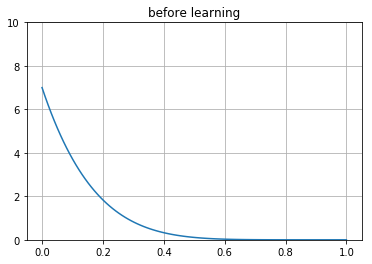

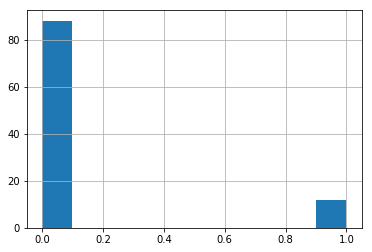

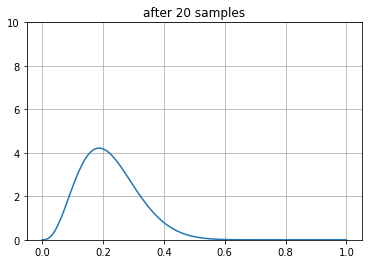

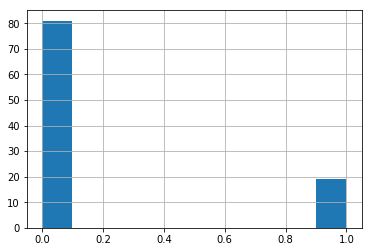

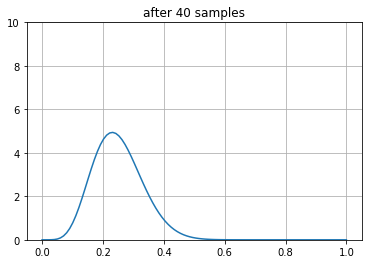

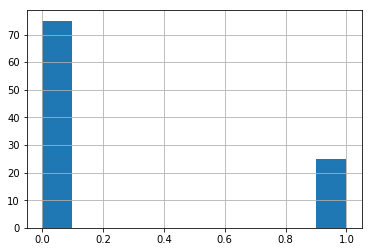

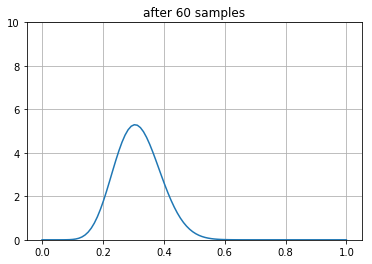

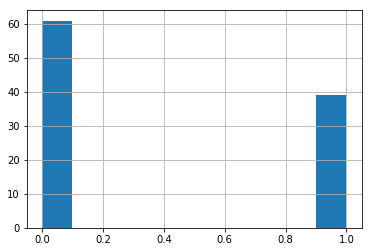

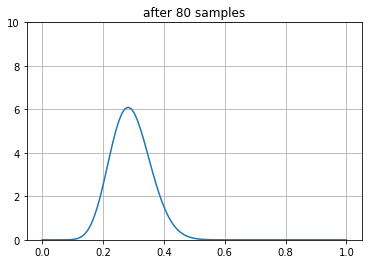

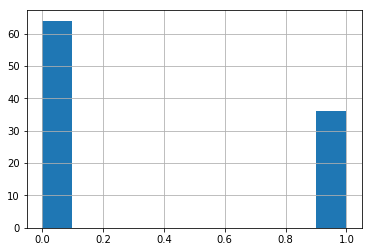

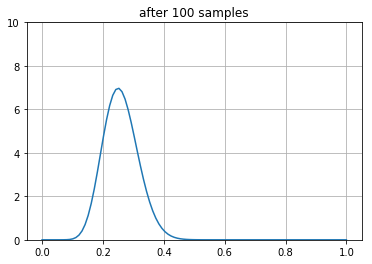

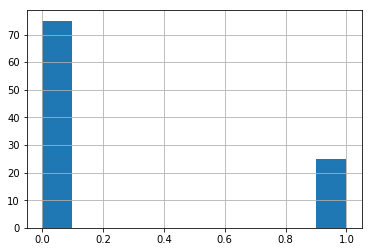

In [4]:
# 初期設定
bern = Bern(1,7)

# 学習前
bern.show_params("before learning")
# 予測分布
plt.hist(bern.sampling(100))
plt.grid()
plt.show()
    
for i in range(5):
    # 真の分布からサンプリング
    true_p = 0.3
    N = 20
    X = np.random.binomial(n=1, p=true_p, size=10)

    # 事後分布の更新
    bern.fit(X)

    # 学習後
    bern.show_params(f"after {N*(i+1)} samples")
    
    # 予測分布
    plt.hist(bern.sampling(100))
    plt.grid()
    plt.show()

## カテゴリ分布の学習

In [6]:
def draw_dirichlet(alpha=[1,1,1], title=""):
    N = 75
    x = np.linspace(0,1,N) 
    y = np.linspace(0,1,N) 
    X, Y = np.meshgrid(x,y) 
    tmp_index = np.where(X+Y>=1)
    X[tmp_index] = np.nan; Y[tmp_index] = np.nan
    Z = 1 - X - Y
    pos = np.empty(X.shape + (3,)) 
    pos[:, :, 0] = X; pos[:, :, 1] = Y; pos[:, :, 2] = Z

    # メッシュ毎の確率密度を求める
    probs = np.empty((N, N))
    for i in range(N):
        for j in range(N):
            probs[i][j] = stats.dirichlet.pdf(x=pos[i][j], alpha=alpha)

    #Make a 3D plot 
    fig = plt.figure() 
    ax = Axes3D(fig)
    ax.plot_wireframe(X, Y, probs)
    ax.set_xlabel('X') 
    ax.set_ylabel('Y') 
    ax.set_zlabel('prob') 
    ax.set_zlim(0,25)
    plt.title(title)
    plt.show() 
    return

In [7]:
class Cat:
    '''ディレクレ分布を事前分布とするカテゴリカル分布の学習
    '''
    def __init__(self, alpha):
        '''事前分布のディレクレ分布の事前パラメータを設定する
        inputs : alpha, 1-d array, {alpha_i > 0}
        '''
        self.alpha = alpha
        
    def fit(self, X):
        '''試行X後の事後分布によって事前分布を更新
        inputs : X, array(N * K), {X[i, :] = one hot }
        return : None
        '''
        self.alpha += np.sum(X, axis=0)
        return 
        
    def show_params(self, title=""):
        '''事後分布(事前分布)を可視化
        return : None
        '''
        draw_dirichlet(self.alpha, title=title)
        return
        
    def sampling(self, N):
        '''事後分布(事前分布)を使って予測を行う
        inputs : N, int, N > 0
        return : array, {0, 1}
        '''
        return np.random.multinomial(1, self.alpha / np.sum(self.alpha), N)

/home/ubuntu/anaconda3/envs/tensorflow_p36/lib/python3.6/site-packages/numpy/core/fromnumeric.py:83: RuntimeWarning: invalid value encountered in reduce
  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)


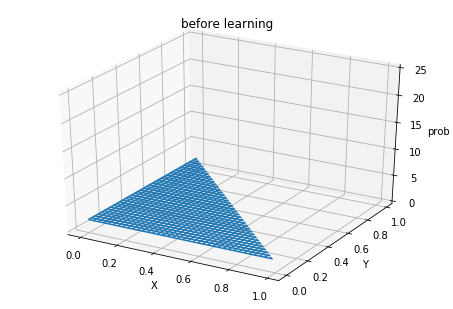

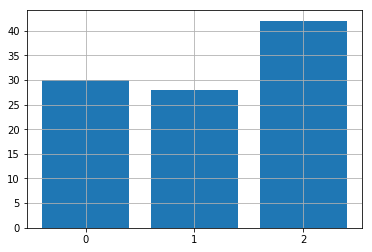

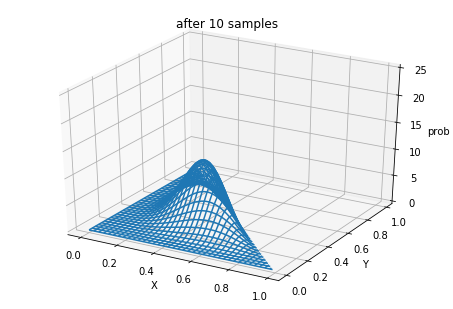

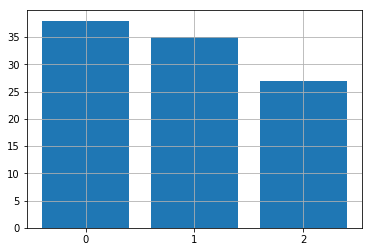

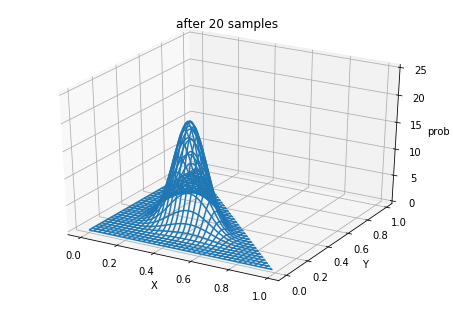

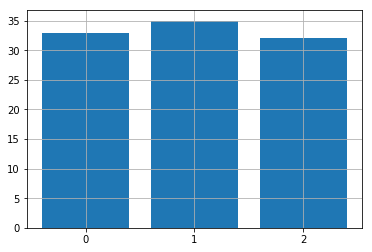

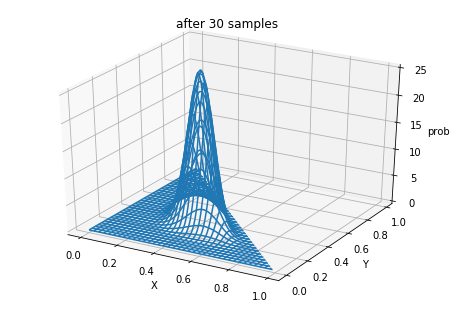

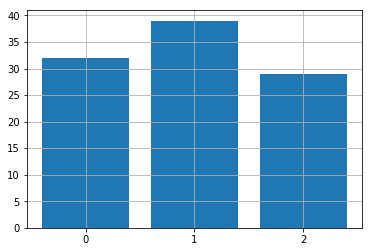

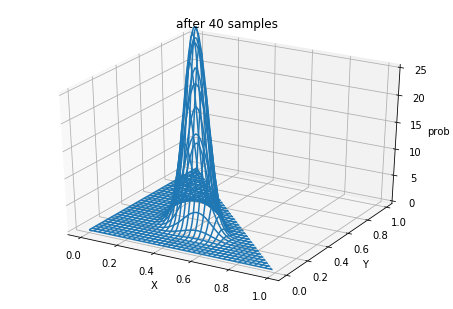

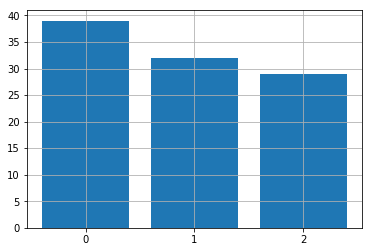

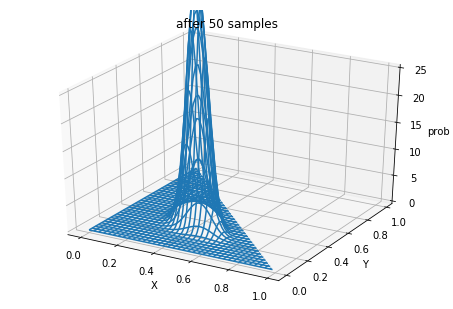

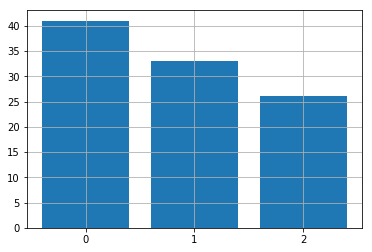

In [10]:
# 初期設定
cat = Cat([1, 1, 1])

# 学習前
cat.show_params("before learning")
# 予測分布
heights = np.sum(cat.sampling(100), axis=0)
plt.bar(np.arange(len(heights)), heights)
plt.xticks(np.arange(len(heights)), np.arange(len(heights)))
plt.grid()
plt.show()
    
for i in range(5):
    # 真の分布からサンプリング
    true_alpha = [5, 2, 2]
    N = 10
    X = np.random.multinomial(1, true_alpha / np.sum(true_alpha), N)

    # 事後分布の更新
    cat.fit(X)

    # 学習後
    cat.show_params(f"after {N*(i+1)} samples")
    
    # 予測分布
    heights = np.sum(cat.sampling(100), axis=0)
    plt.bar(np.arange(len(heights)), heights)
    plt.xticks(np.arange(len(heights)), np.arange(len(heights)))
    plt.grid()
    plt.show()

before learning


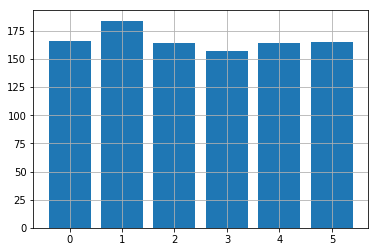

after 10 samples


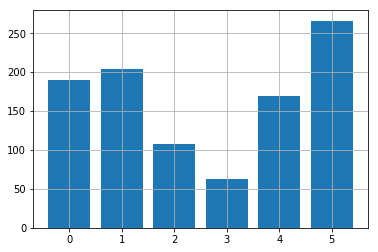

after 20 samples


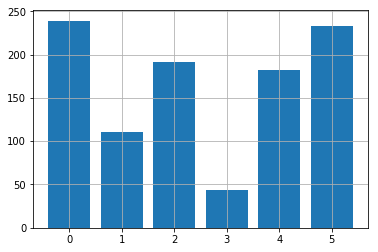

after 30 samples


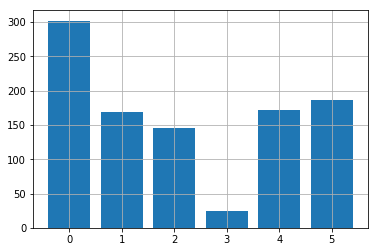

after 40 samples


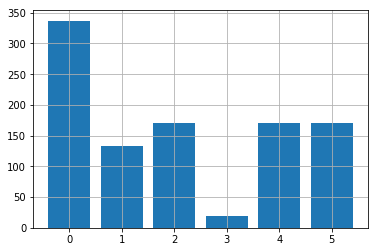

after 50 samples


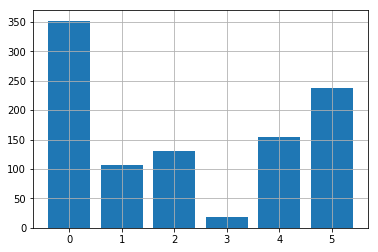

In [9]:
# 初期設定
cat = Cat([1, 1, 1, 1, 1, 1])

# # 学習前
print("before learning")
# 予測分布
heights = np.sum(cat.sampling(1000), axis=0)
plt.bar(np.arange(len(heights)), heights)
plt.xticks(np.arange(len(heights)), np.arange(len(heights)))
plt.grid()
plt.show()
    
for i in range(5):
    print(f"after {N*(i+1)} samples")
    # 真の分布からサンプリング
    true_alpha = [5, 2, 2, 1, 4, 4]
    N = 10
    X = np.random.multinomial(1, true_alpha / np.sum(true_alpha), N)

    # 事後分布の更新
    cat.fit(X)
    
    # 予測分布
    heights = np.sum(cat.sampling(1000), axis=0)
    plt.bar(np.arange(len(heights)), heights)
    plt.xticks(np.arange(len(heights)), np.arange(len(heights)))
    plt.grid()
    plt.show()

## ポアソン分布の学習

In [11]:
class Poi:
    '''ガンマ分布を事前分布とするポアソン分布の学習
    '''
    def __init__(self, a, b):
        '''事前分布のガンマ分布の事前パラメータを設定する
        inputs : a, float, a > 0
                      b, float, b > 0
        '''
        self.a = a
        self.b = b
        
    def fit(self, X):
        '''試行X後の事後分布によって事前分布を更新
        inputs : X, 1-d array, {X_i > 0}
        return : None
        '''
        self.a += np.sum(X) + self.a
        self.b += len(X) + self.b
        return 
        
    def show_params(self, title=""):
        '''事後分布(事前分布)を可視化
        return : None
        '''
        x = np.linspace(0, 20, 100)
        plt.plot(x, stats.gamma.pdf(x,self.a,scale=1./self.b))
        plt.grid()
        plt.show()
        return
        
    def sampling(self, N):
        '''予測分布からのサンプリング
        inputs : N, int, N > 0
        return : array, {0, 1}
        '''
        p  = 1/(1+self.b)
        return stats.nbinom.rvs(self.a, 1-p, size=N)

before learning


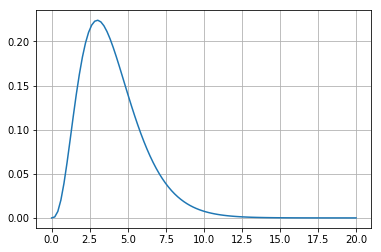

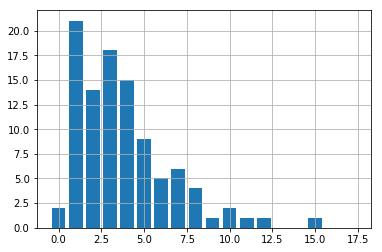

after 10 samples


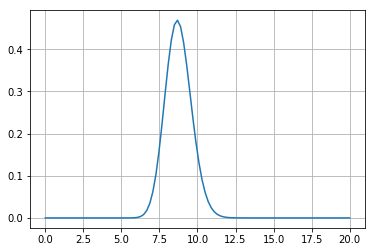

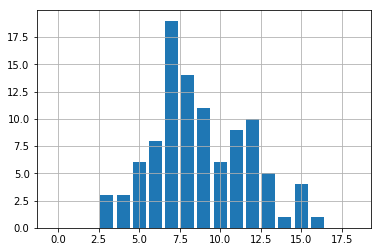

after 20 samples


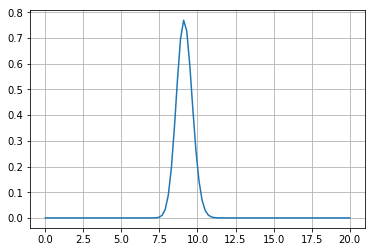

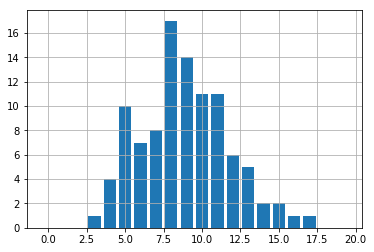

after 30 samples


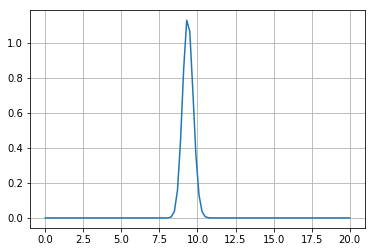

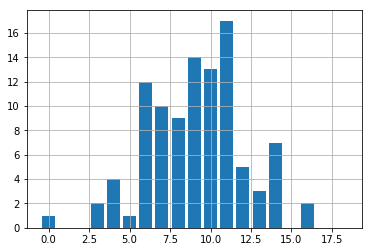

after 40 samples


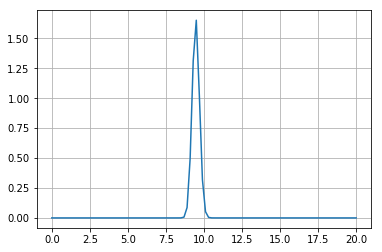

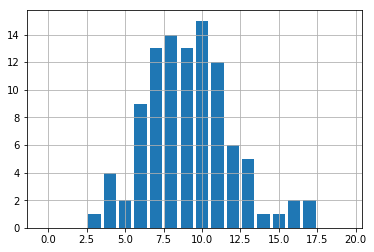

after 50 samples


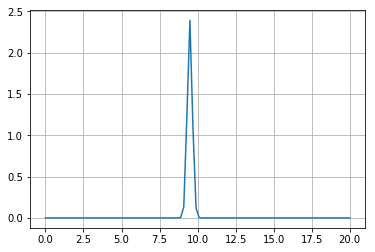

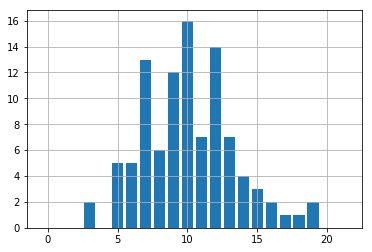

In [12]:
# 初期設定
poi = Poi(4, 1)

# # 学習前
print("before learning")
poi.show_params()

# 予測分布
sampled = poi.sampling(100)
n = int(max(sampled)*1.2)
heights = np.zeros(n)
for i in range(n):
    heights[i] = np.sum(sampled == i)
plt.bar(np.arange(n), heights)
plt.grid()
plt.show()
    
for i in range(5):
    print(f"after {N*(i+1)} samples")
    # 真の分布からサンプリング
    true_lambda = 10
    N = 10
    X = np.random.poisson(true_lambda, N)

    # 事後分布の更新
    poi.fit(X)
    poi.show_params()
    
    # 予測分布
    sampled = poi.sampling(100)
    n = int(max(sampled)*1.2)
    heights = np.zeros(n)
    for i in range(n):
        heights[i] = np.sum(sampled == i)
    plt.bar(np.arange(n), heights)
    plt.grid()
    plt.show()

## ガウス分布の学習 - 平均のみ未知 -

In [13]:
def draw_gauss(m = [0.5, -5], lam = [[2.0, 0.6], [0.6, 4]], title=""):
    x = np.linspace(-10,10,100) 
    y = np.linspace(-10,10,100) 
    X, Y = np.meshgrid(x,y) 
    pos = np.empty(X.shape + (2,)) 
    pos[:, :, 0] = X; pos[:, :, 1] = Y

    #Make a 3D plot 
    fig = plt.figure() 
    ax = Axes3D(fig)
    rv = stats.multivariate_normal(m.reshape(-1), lam)
    probs = rv.pdf(pos)
    ax.plot_wireframe(X, Y, probs)
    ax.set_xlabel('X') 
    ax.set_ylabel('Y') 
    ax.set_zlabel('prob') 
    ax.set_zlim(0, np.max(probs) * 1.1)
    plt.title(title)
    plt.show() 
    return

In [14]:
class Gauss_mu:
    '''平均が未知の多次元ガウス分布の学習
    '''
    def __init__(self, lam, m_mu, lam_mu):
        '''事前分布の初期パラメータを設定する
        inputs : lam, array(D * D)
                      m_mu, array(D*1)
                      lambda_mu, array(D * D)
        '''
        self.lam = np.array(lam)
        self.sigma = np.linalg.inv(lam)
        self.m_mu = np.array(m_mu)
        self.lam_mu = np.array(lam_mu)
        self.sigma_mu = np.linalg.inv(lam_mu)
        
    def fit(self, X):
        '''試行X後の事後分布によって事前分布を更新
        inputs : X, array(N*D)
        return : None
        '''
        lam_mu_ = self.lam_mu + X.shape[0] * self.lam
        tmp = np.dot(self.lam, np.sum(X, axis=0).reshape(-1, 1))
        tmp_ = np.dot(self.lam_mu, self.m_mu.T)
        self.m_mu = np.dot(np.linalg.inv(lam_mu_), (tmp +  tmp_)).T
        self.lam_mu = lam_mu_
        self.sigma_mu = np.linalg.inv(lam_mu_)
        return 
        
    def show_params(self, title=""):
        '''事後分布(事前分布)を可視化
        return : None
        '''
        draw_gauss(self.m_mu, self.sigma_mu)
        return
        
    def sampling(self, N):
        '''予測分布からのサンプリング
        inputs : N, int, N > 0
        return : array(N * D)
        '''
        draw_gauss(self.m_mu.reshape(-1), self.sigma+self.sigma_mu)
        return stats.multivariate_normal.rvs(self.m_mu.reshape(-1), self.sigma+self.sigma_mu, size=N)

before learning


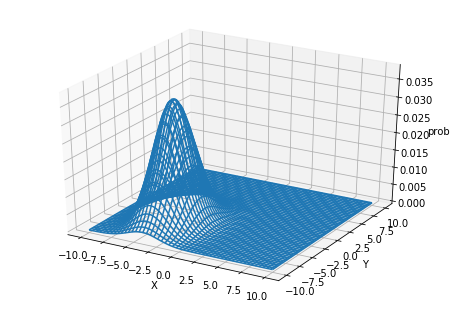

after 6 samples


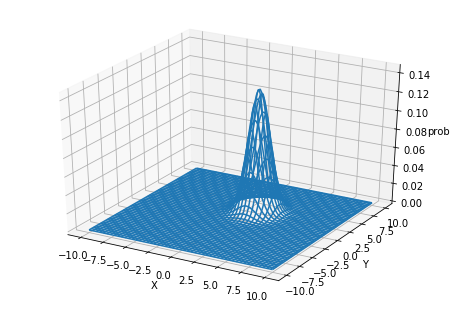

after 12 samples


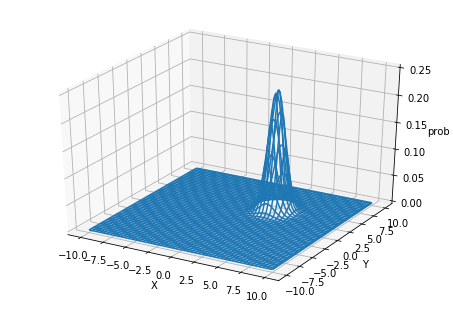

after 18 samples


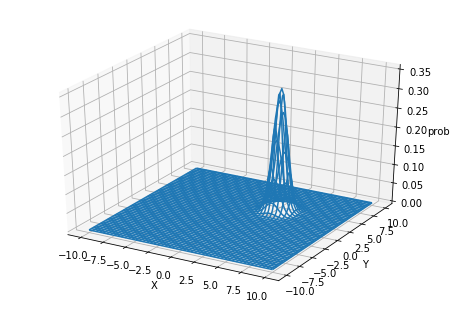

after 24 samples


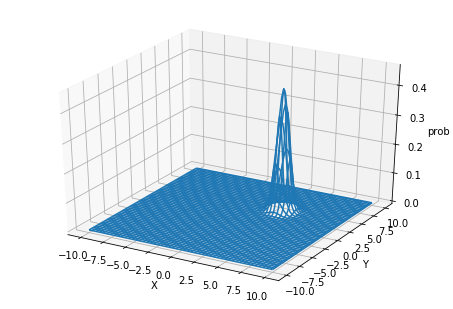

after 30 samples


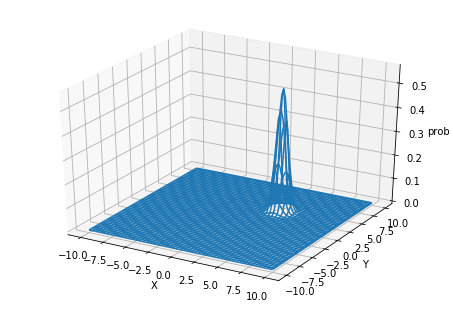

In [15]:
# 初期設定
sigma = np.array([[10, 0], [0, 10]], dtype = 'float64')
lam = np.linalg.inv(sigma)

m_mu = np.array([[-4, -4]], dtype = 'float64')
sigma_mu = np.array([[3, 0], [0, 7]], dtype = 'float64')
lam_mu = np.linalg.inv(sigma_mu)

gauss_mu = Gauss_mu(lam, m_mu, lam_mu)

# # 学習前
print("before learning")
gauss_mu.show_params()

# # 予測分布
# sampled = gauss_mu.sampling(100)
    
N = 6
true_m = np.array([[4, 4]], dtype = 'float64')
true_sigma = np.array([[2, 0], [0, 2]], dtype = 'float64')
for i in range(5):
    print(f"after {N*(i+1)} samples")
    # 真の分布からサンプリング
    X = stats.multivariate_normal.rvs(true_m.reshape(-1), true_sigma, size=N)
    
    # 事後分布の更新
    gauss_mu.fit(X)
    gauss_mu.show_params()
    
#     # 予測分布
#     sampled = gauss_mu.sampling(100)

## ガウス分布の学習 - 精度のみ未知 -

In [16]:
def multi_t_rvs(mu, sigma, nu, N):
    '''
    Output: Produce N samples of d-dimension t distribution
    Input:
    mu = mean (d dimensional numpy array or scalar)
    sigma = scale matrix (dxd numpy array)
    nu = degrees of freedom
    N = # of samples to produce
    '''
    D = sigma.shape[0]
    g = np.tile(np.random.gamma(nu/2., 2./nu, N), reps=(D, 1)).T
    Z = np.random.multivariate_normal(np.zeros(D), sigma, N)
    return mu + Z/np.sqrt(g)

In [17]:
def show_img(X, sampled, title="", save_path=None):
    '''2次元の標本を散布図で比較する
    '''
    plt.scatter(X[:, 0], X[:, 1], color="blue", label="true")
    plt.scatter(sampled[:, 0], sampled[:, 1], color="orange", label="pred")
    plt.ylim(-10, 10)
    plt.xlim(-10, 10)
    plt.legend()
    plt.title(title)
    if save_path:
        plt.savefig(save_path)
    plt.show()
    return

In [18]:
class Gauss_lam:
    '''平均が未知の多次元ガウス分布の学習
    '''
    def __init__(self, mu, lam_nu, lam_w):
        '''事前分布の初期パラメータを設定する
        inputs : mu, array(D * 1)
                      lam_nu, float, lam_nu > D -1
                      lam_w, array(D * D), lam_w > 0
        '''
        self.mu = np.array(mu)
        self.lam_nu = lam_nu
        self.lam_w = np.array(lam_w)
        self.lam_w_inv = np.linalg.inv(lam_w)
        self.D = lam_w.shape[0]
        
    def fit(self, X):
        '''試行X後の事後分布によって事前分布を更新
        inputs : X, array(N*D)
        return : None
        '''
        self.lam_nu += X.shape[0]
        tmp = X - np.tile(self.mu, reps=(X.shape[0], 1))
        tmp_ = np.zeros((self.D, self.D))
        for i in range(X.shape[0]):
            tmp_ += np.dot(tmp[i, :].reshape(self.D, 1), tmp[i, :].reshape(1, self.D))
        self.lam_w_inv += tmp_
        self.lam_w = np.linalg.inv(self.lam_w_inv)
        return 
        
    def show_params(self, title=""):
        '''事後分布(事前分布)を可視化
        return : None
        '''
        lams = stats.wishart.rvs(df=self.lam_nu, scale = self.lam_w, size=1000)
        e_lam = np.mean(lams, axis=0)
        return e_lam
        
    def sampling(self, N):
        '''予測分布からのサンプリング
        inputs : N, int, N > 0
        return : array(N * D)
        '''
        mu_s = self.mu
        nu_s = 1 - self.D + self.lam_nu
        sigma_s = (1/nu_s)*self.lam_w_inv
        return multi_t_rvs(mu_s,  sigma_s, nu_s, N)

before learning


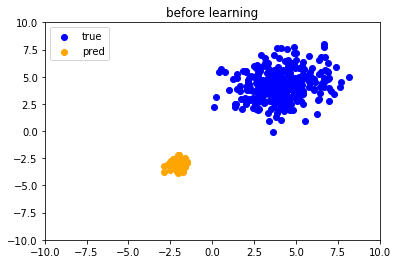

after 3 samples


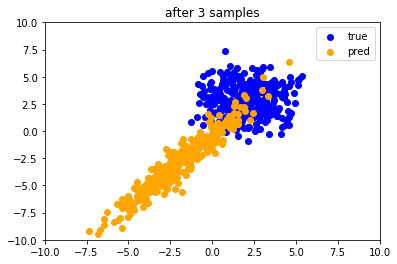

after 6 samples


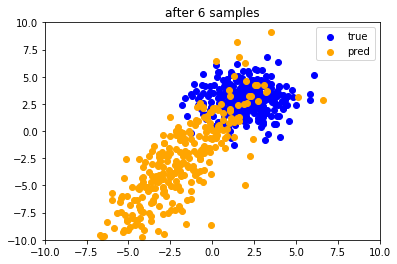

after 9 samples


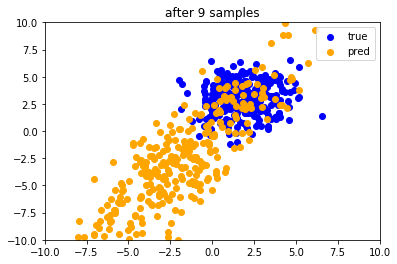

after 12 samples


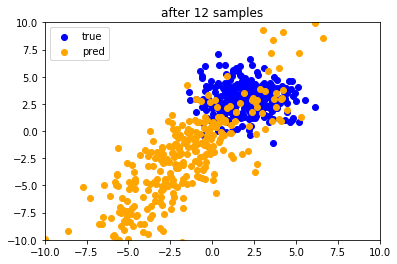

after 15 samples


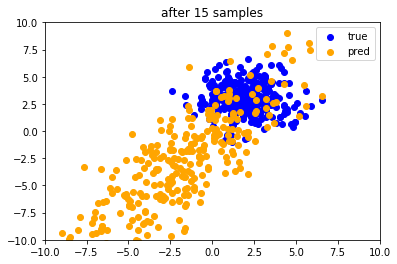

after 18 samples


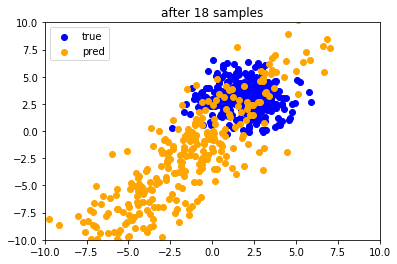

after 21 samples


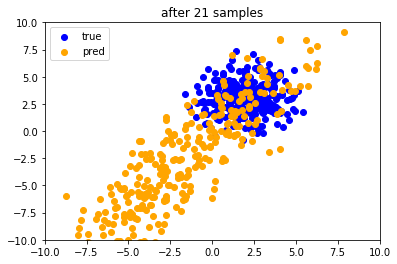

after 24 samples


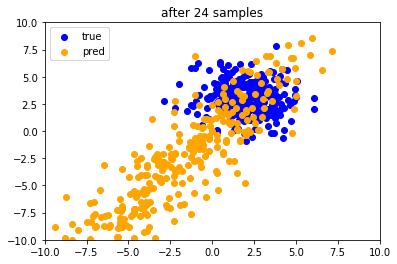

after 27 samples


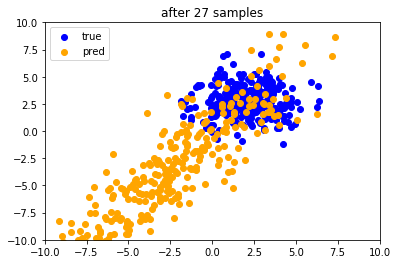

after 30 samples


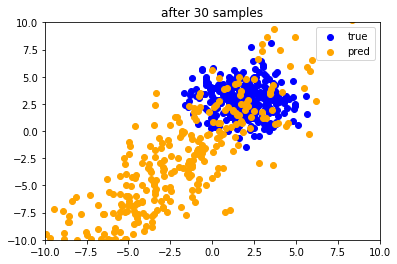

In [19]:
# 初期設定
mu = np.array([[-2, -3]], dtype="float64")

lam_nu = 10
lam_w = np.array([[3, 0], [0, 3]], dtype = 'float64')

gauss_lam = Gauss_lam(mu, lam_nu, lam_w)

# 学習前
print("before learning")
# print(gauss_lam.show_params())

# 予測分布
img_num = 0
X = stats.multivariate_normal.rvs(true_m.reshape(-1), true_sigma, size=300)
sampled = gauss_lam.sampling(300)
show_img(X, sampled, "before learning", IMG_PATH+f"{img_num}.png")


N = 3
max_iter = 10
true_m = np.array([[2, 3]], dtype = 'float64')
true_sigma = np.array([[2, 0], [0, 2]], dtype = 'float64')
true_lam = np.linalg.inv(true_sigma)
for i in range(max_iter):
    print(f"after {N*(i+1)} samples")
    # 真の分布からサンプリング
    X = stats.multivariate_normal.rvs(true_m.reshape(-1), true_sigma, size=N)
    
    # 事後分布の更新
    gauss_lam.fit(X)
#     print(gauss_lam.show_params())
    
    # 予測分布
    img_num += 1
    X = stats.multivariate_normal.rvs(true_m.reshape(-1), true_sigma, size=300)
    sampled = gauss_lam.sampling(300)
    show_img(X, sampled, f"after {N*(i+1)} samples", IMG_PATH+f"{img_num}.png")
ims = []
for i in range(max_iter+1):
    ims.append(Image.open(IMG_PATH+f"{i}.png"))
ims[0].save(IMG_PATH+"out.gif", save_all=True, append_images=ims[1:])

## ガウス分布の学習 -両方未知- 

In [20]:
class Gauss:
    '''平均と精度が未知の多次元ガウス分布の学習
    '''
    def __init__(self, mu, lam, 
                                    mu_m, mu_beta,
                                    lam_nu, lam_w):
        '''事前分布の初期パラメータを設定する
        inputs : mu, array(D * 1)
                      lam, array(D * D), lam > 0
                      mu_m, array(D * 1)
                      mu_beta, float, mu_beta > 0
                      lam_nu, float, lam_nu > D -1
                      lam_w, array(D * D), lam_w > 0
        '''
        # 観測モデル
        self.mu = np.array(mu)
        self.lam = np.array(lam)
        self.sigma = np.linalg.inv(self.lam)
        # 事前分布：ガウス
        self.mu_m = np.array(mu_m)
        self.mu_beta = mu_beta
        # 事前分布:ウィシャート
        self.lam_nu = lam_nu
        self.lam_w = np.array(lam_w)
        self.lam_w_inv = np.linalg.inv(lam_w)
        
        self.D = lam_w.shape[0]
        
    def fit(self, X):
        '''試行X後の事後分布によって事前分布を更新
        inputs : X, array(N*D)
        return : None
        '''
        # 事後分布：ガウス
        mu_beta_old = float(self.mu_beta)
        self.mu_beta += X.shape[0]
        mu_m_old = np.array(self.mu_m)
        self.mu_m = (np.sum(X, axis=0) + mu_beta_old * mu_m_old) / (self.mu_beta)
        # 事後分布：ウィシャート
        self.lam_nu += X.shape[0]
        tmp_ = np.zeros((self.D, self.D))
        for i in range(X.shape[0]):
            tmp_ += np.dot(X[i, :].reshape(self.D, 1), X[i, :].reshape(1, self.D))
        self.lam_w_inv += (tmp_ + mu_beta_old * np.dot(mu_m_old.T, mu_m_old) 
                                        - self.mu_beta * np.dot(self.mu_m .T, self.mu_m))
        self.lam_w = np.linalg.inv(self.lam_w_inv)
        return 
        
    def show_params(self, title=""):
        '''事後分布(事前分布)を可視化
        return : None
        '''
        lams = stats.wishart.rvs(df=self.lam_nu, scale = self.lam_w, size=1000)
        e_lam = np.mean(lams, axis=0)
        draw_gauss(self.mu_m, np.linalg.inv(e_lam)/self.mu_beta)
        return e_lam
        
    def sampling(self, N):
        '''予測分布からのサンプリング
        inputs : N, int, N > 0
        return : array(N * D)
        '''
        mu_s = self.mu_m
        nu_s = 1 - self.D + self.lam_nu
        sigma_s = self.lam_w_inv * (1 + self.mu_beta) / (nu_s * self.mu_beta)
        return multi_t_rvs(mu_s,  sigma_s, nu_s, N)

before learning


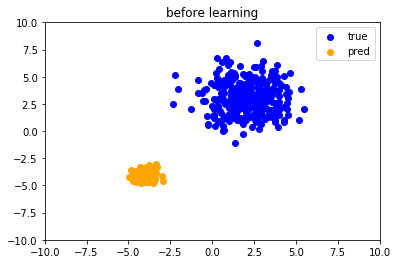

after 5 samples


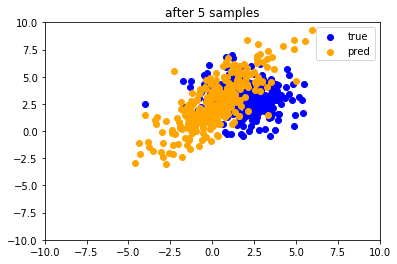

after 10 samples


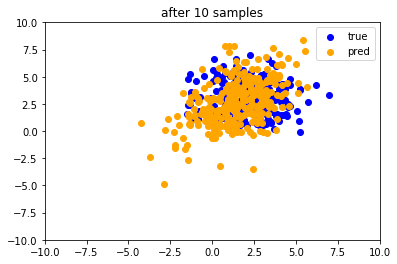

after 15 samples


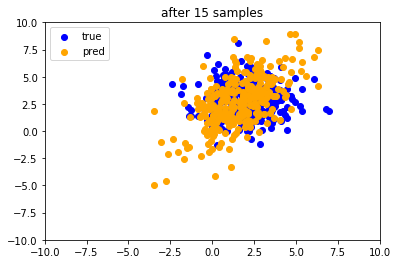

after 20 samples


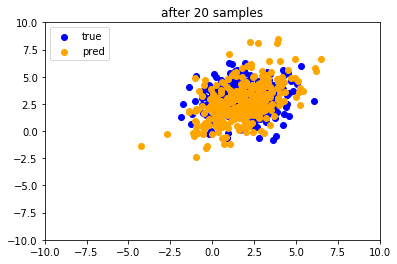

after 25 samples


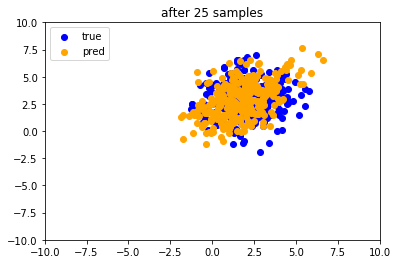

after 30 samples


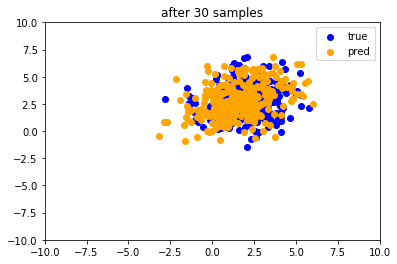

after 35 samples


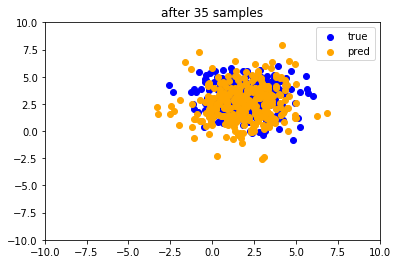

after 40 samples


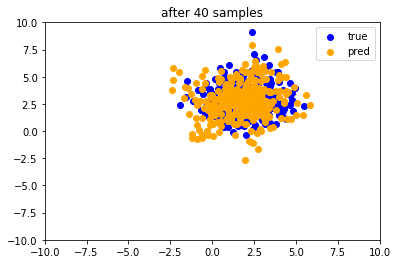

after 45 samples


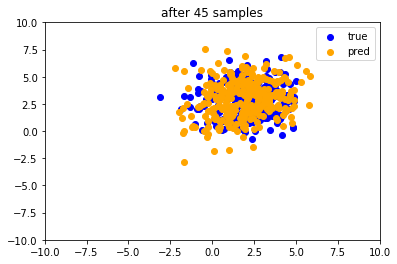

after 50 samples


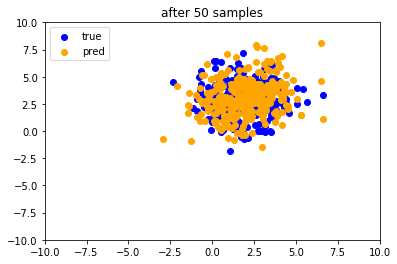

after 55 samples


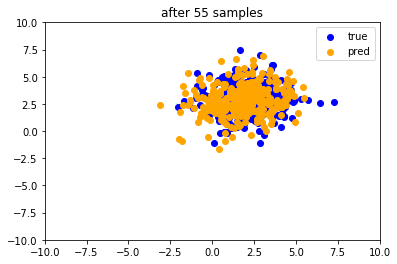

after 60 samples


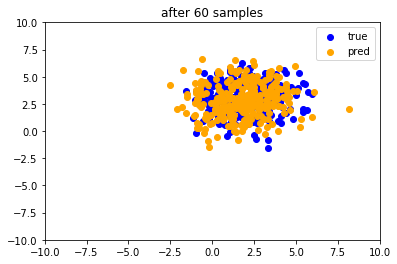

In [21]:
# 初期設定
mu = np.array([[-2, -3]], dtype="float64")
sigma = np.array([[10, 0], [0, 10]], dtype = 'float64')
lam = np.linalg.inv(sigma)

m_mu = np.array([[-4, -4]], dtype = 'float64')
m_beta = 1
sigma_mu = np.array([[3, 0], [0, 7]], dtype = 'float64')
lam_mu = np.linalg.inv(sigma_mu)

lam_nu = 10
lam_w = np.array([[3, 0], [0, 3]], dtype = 'float64')

gauss = Gauss(mu, lam, 
                          m_mu, m_beta,
                          lam_nu, lam_w)

# # 学習前
print("before learning")
# print(gauss.show_params())

# 予測分布
img_num = 0
X = stats.multivariate_normal.rvs(true_m.reshape(-1), true_sigma, size=300)
sampled = gauss.sampling(300)
show_img(X, sampled, "before learning", IMG_PATH+f"{img_num}.png")


N = 5
max_iter = 12
true_m = np.array([[2, 3]], dtype = 'float64')
true_sigma = np.array([[2, 0], [0, 2]], dtype = 'float64')
true_lam = np.linalg.inv(true_sigma)
for i in range(max_iter):
    print(f"after {N*(i+1)} samples")
    # 真の分布からサンプリング
    X = stats.multivariate_normal.rvs(true_m.reshape(-1), true_sigma, size=N)
    
    # 事後分布の更新
    gauss.fit(X)
#     print(gauss.show_params())
    
    # 予測分布
    img_num += 1
    X = stats.multivariate_normal.rvs(true_m.reshape(-1), true_sigma, size=300)
    sampled = gauss.sampling(300)
    show_img(X, sampled, f"after {N*(i+1)} samples", IMG_PATH+f"{img_num}.png")
ims = []
for i in range(max_iter+1):
    ims.append(Image.open(IMG_PATH+f"{i}.png"))
ims[0].save(IMG_PATH+"out.gif", save_all=True, append_images=ims[1:], duration=60)

## 線形回帰の学習

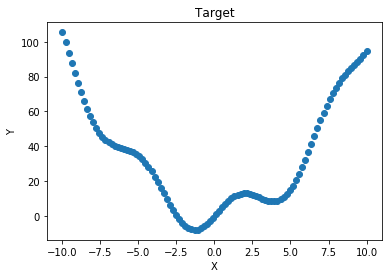

In [39]:
# 学習対象
# X = np.random.uniform(-10, 10, size=30)
X = np.linspace(-10,10,100) 
Y = 10*np.sin(X) + X**2
plt.scatter(X, Y)
plt.xlabel("X")
plt.ylabel("Y")
plt.title("Target")
plt.show()

In [40]:
class LinearRegression:
    '''平均と精度が未知の多次元ガウス分布の学習
    '''
    def __init__(self, lam, w_m, w_lam):
        '''事前分布の初期パラメータを設定する
        inputs : lam, float, lam > 0
                      w_m, array(D * 1)
                      w_lam, array(D * D), lam_w > 0
        '''
        self.lam = lam
        self.w_m = np.array(w_m)
        self.w_lam = np.array(w_lam)
        self.w_lam_inv = np.linalg.inv(self.w_lam)
        
        self.D = w_lam.shape[0]
        
    def fit(self, X, Y):
        '''試行X後の事後分布によって事前分布を更新
        inputs : X, array(D * N)
                      Y, array(1 * N)
        return : None
        '''
        tmp = np.zeros((self.D, self.D))
        for i in range(X.shape[1]):
            tmp += np.dot(X[:, i].reshape(self.D, 1), X[:, i].reshape(1, self.D))
        w_lam_old = np.array(self.w_lam)
        self.w_lam += self.lam*tmp
        self.w_lam_inv = np.linalg.inv(self.w_lam)
        tmp = self.lam * np.dot(X, Y.reshape(-1, 1)) + np.dot(w_lam_old, self.w_m.reshape(-1, 1))
        self.w_m = np.dot(self.w_lam_inv, tmp)
        return 
                
    def pred(self, X):
        '''学習したパラメータをつかって新たなデータで回帰
        inputs : X, array(D * N)
        return : array(N * D)
        '''
        return np.dot(self.w_m.reshape(1, -1), X)

    def pred_1sigma(self, X):
        '''学習したパラメータをつかって新たなデータで回帰
        inputs : X, array(D * N)
        return : array(N * D)
        '''
        sigmas = []
        for i in range(X.shape[1]):
            sigmas.append((1/self.lam) + np.dot(np.dot(X[:,i].T, self.w_lam_inv), X[:,i]))
        return np.array(sigmas)

before learning


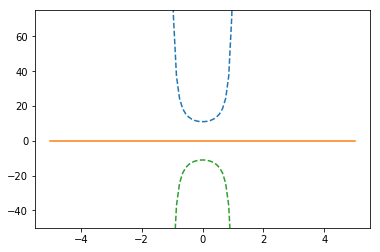

after 5 samples
0.0003676414489746094


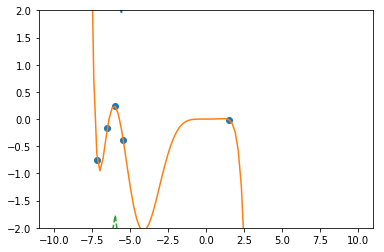

after 10 samples
0.00033926963806152344


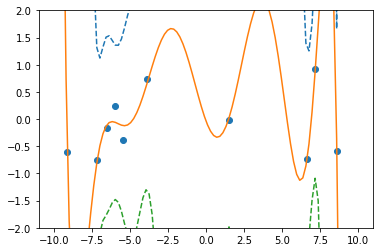

after 15 samples
0.0004477500915527344


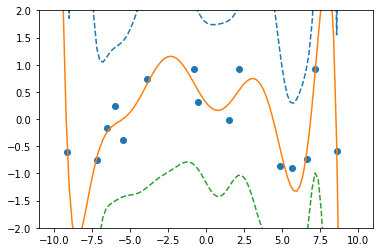

after 20 samples
0.00016760826110839844


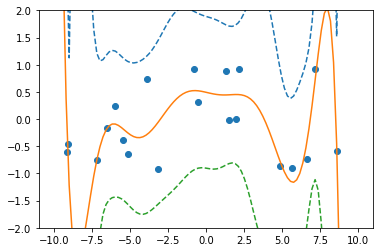

after 25 samples
0.00023674964904785156


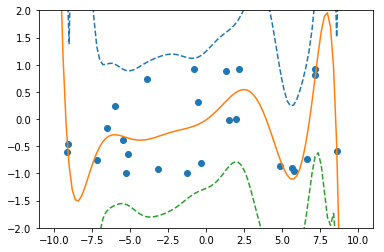

after 30 samples
0.00026702880859375


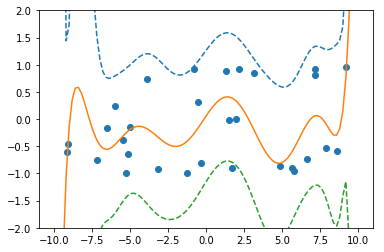

after 35 samples
0.00016164779663085938


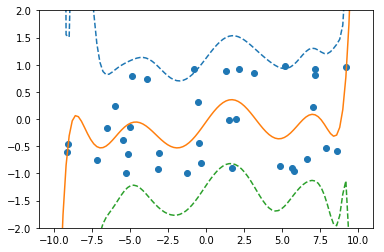

after 40 samples
0.00023221969604492188


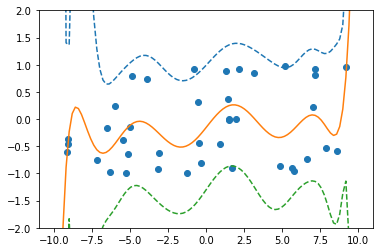

after 45 samples
0.0002548694610595703


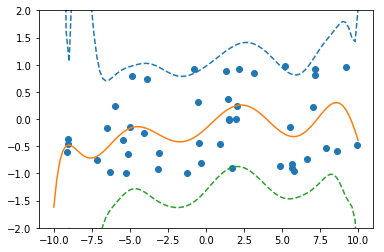

after 50 samples
0.0003376007080078125


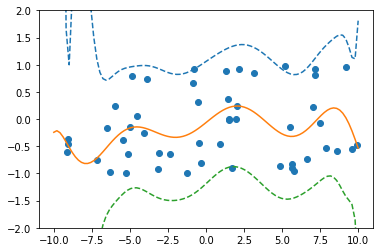

after 55 samples
0.0004611015319824219


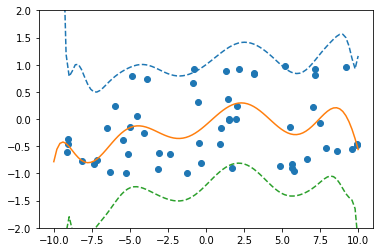

after 60 samples
0.000400543212890625


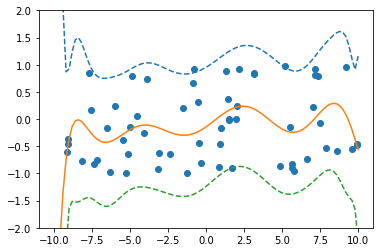

In [62]:
# 初期設定
dim = 10
lam = 0.1
w_m = np.zeros(dim)
w_sigma = np.eye(dim) * 10
w_lam = np.linalg.inv(w_sigma)

lr = LinearRegression(lam, w_m, w_lam)

# # 学習前
print("before learning")

# 予測分布
X = np.linspace(-5, 5,100) 
data = np.array([X**i for i in range(dim)])
pred = lr.pred(data).reshape(-1)
one_sigma =  lr.pred_1sigma(data).reshape(-1)
plt.plot(X, pred+one_sigma, linestyle="dashed")
plt.plot(X, pred)
plt.plot(X, pred-one_sigma, linestyle="dashed")
plt.ylim(-50, 75)
plt.show()
# show_img(X, sampled, "before learning", IMG_PATH+f"{img_num}.png")


N = 5
max_iter = 12
X_all = np.zeros(2)
Y_all = np.zeros(2)
for i in range(max_iter):
    print(f"after {N*(i+1)} samples")
    # 真のモデルからのデータ
    X = np.random.uniform(-10, 10, size=N)
    data = np.array([X**i for i in range(dim)])
    Y =  X**2 + 10*np.sin(X) + np.random.normal(0, 1/lam)
    X_all = np.r_[X_all, X]; Y_all = np.r_[Y_all, Y]
    
    # 事後分布の更新
    start = time.time()
    lr.fit(data, Y)
    print(time.time() - start)
#     print(gauss.show_params())
    
    # 予測分布
    X = np.linspace(-10,10,100) 
    data = np.array([X**i for i in range(dim)])
    pred = lr.pred(data).reshape(-1)
    one_sigma =  lr.pred_1sigma(data).reshape(-1)
    plt.scatter(X_all[2:], Y_all[2:])
    plt.plot(X, pred+one_sigma, linestyle="dashed")
    plt.plot(X, pred)
    plt.plot(X, pred-one_sigma, linestyle="dashed")
    plt.ylim(-2, 2)
    plt.show()
# ims = []
# for i in range(max_iter+1):
#     ims.append(Image.open(IMG_PATH+f"{i}.png"))
# ims[0].save(IMG_PATH+"out.gif", save_all=True, append_images=ims[1:], duration=60)